In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import colourblind as cb

In [24]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

In [2]:
"""Includes a separate entry for each alliance-phase. We code a new phase as beginning
 whenever the written documents establishing the alliance are changed in ways that affect
 the coding of one or more of our variables. Thus, if an alliance agreement is amended
 after ten years to include a new institutional structure, we begin a new alliance phase
 (see section 1.53 above). 44 of the 765 alliances in version 5.0 have more than one phase."""
atop_phase = pd.read_csv("./ATOP_data/atop5_1aph.csv")

In [3]:
atop_phase.info()
atop_phase.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Columns: 134 entries, atopid to version
dtypes: float64(106), int64(28)
memory usage: 888.9 KB


,atopid,atopidphase,cowid,cow4id,begyr,begmo,begday,endyr,endmo,endday,...,mem52,mem53,mem54,mem55,mem56,mem57,source,new5,rev5,version
0,1005,1005.0,NaN,NaN,1815,1,3.0,1815,2,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,5.1
1,1010,1010.0,NaN,NaN,1815,1,14.0,1815,6,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,5.1
2,1015,1015.0,NaN,NaN,1815,4,29.0,1815,6,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,5.1
3,1020,1020.1,2005.0,3.0,1815,6,8.0,1820,5,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,5.1
4,1020,1020.2,2005.0,3.0,1820,5,15.0,1848,3,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,5.1


In [4]:
atop_phase.isnull().sum()

atopid           0
atopidphase      0
cowid          511
cow4id         425
begyr            0
              ... 
mem57          848
source           0
new5             0
rev5             0
version          0
Length: 134, dtype: int64

In [5]:
""" Combining member columns into a single column as a list of members """

# Gets all column member names
member_columns = [f"mem{i}" for i in range(1, 58)]

# Creates a new column with a list of members with no NaN values
atop_phase["members"] = atop_phase[member_columns].apply(lambda x: set(x.dropna()), axis=1)

# Drops all old member columns
atop_phase.drop(member_columns, axis=1, inplace=True)
atop_phase.head()

,atopid,atopidphase,cowid,cow4id,begyr,begmo,begday,endyr,endmo,endday,...,conres,agprois,conmen,ecaid,interv,source,new5,rev5,version,members
0,1005,1005.0,NaN,NaN,1815,1,3.0,1815,2,8.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,5.1,"{200.0, 300.0, 240.0, 210.0, 245.0, 220.0}"
1,1010,1010.0,NaN,NaN,1815,1,14.0,1815,6,8.0,...,0.0,0.0,0.0,1.0,0.0,1,0,0,5.1,"{275.0, 300.0}"
2,1015,1015.0,NaN,NaN,1815,4,29.0,1815,6,12.0,...,2.0,3.0,0.0,0.0,0.0,1,0,0,5.1,"{329.0, 300.0}"
3,1020,1020.1,2005.0,3.0,1815,6,8.0,1820,5,15.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,5.1,"{267.0, 300.0, 269.0, 271.0, 240.0, 273.0, 275..."
4,1020,1020.2,2005.0,3.0,1820,5,15.0,1848,3,31.0,...,0.0,0.0,0.0,0.0,2.0,1,0,0,5.1,"{267.0, 300.0, 269.0, 271.0, 240.0, 273.0, 275..."


In [6]:
list(atop_phase.columns)

['atopid',
 'atopidphase',
 'cowid',
 'cow4id',
 'begyr',
 'begmo',
 'begday',
 'endyr',
 'endmo',
 'endday',
 'ineffect',
 'bilat',
 'phase',
 'maxphase',
 'wartime',
 'estmode',
 'pubsecr',
 'secrart',
 'proadd',
 'futmem',
 'speclgth',
 'length',
 'renounce',
 'proren',
 'renewlgt',
 'term',
 'defense',
 'offense',
 'neutral',
 'nonagg',
 'consul',
 'active',
 'conditio',
 'defcon',
 'offcon',
 'neucon',
 'concon',
 'asymm',
 'notaiden',
 'dipaid',
 'terrres',
 'seppeace',
 'thirdcom',
 'noothall',
 'specthrt',
 'statthr1',
 'statthr2',
 'conwtin',
 'medarb',
 'milcon',
 'milaid',
 'intcom',
 'subord',
 'organ1',
 'orgpurp1',
 'organ2',
 'orgpurp2',
 'base',
 'contrib',
 'armred',
 'acqterr',
 'divgains',
 'demwith',
 'reflnun',
 'refothio',
 'natrefal',
 'compag',
 'nomicoop',
 'conres',
 'agprois',
 'conmen',
 'ecaid',
 'interv',
 'source',
 'new5',
 'rev5',
 'version',
 'members']

In [7]:
# Convert COW country codes to country names
codes = pd.read_csv("../COW/COW_data/COW-country-codes.csv")
def cow_name(cow_code):
    return codes[codes["CCode"] == cow_code]["StateNme"].values[0]

In [8]:
""" Finding Member Secession """
# Each time an alliance phase exists check if a member secedes
phase_alliances = atop_phase.groupby('atopid').filter(lambda group: (group['phase'] > 0).any())
states_sec = {}
states_acc = {}
phases_by_alliance = phase_alliances.groupby('atopid')

for atopid, group in phase_alliances.groupby('atopid'):
    phase_members_sets = group['members']
    for i in range(len(phase_members_sets)):
        if i == 0:
            continue

        # Bilateral alliances can become two separate alliances if a state is suceeded.
        if len(phase_members_sets) == 3:
            if group['phase'].iloc[i] == 2:
                date_state1 = f"{group['begyr'].iloc[i]}/{group['begmo'].iloc[i]}/{group['begday'].iloc[i]}"
                date_state2 = f"{group['begyr'].iloc[i+1]}/{group['begmo'].iloc[i+1]}/{group['begday'].iloc[i+1]}"

                if date_state1 == date_state2:
                    continue
            else:
                continue

        seceding = phase_members_sets.iloc[i] - phase_members_sets.iloc[i-1]
        acceding = phase_members_sets.iloc[i-1] - phase_members_sets.iloc[i]
        if seceding:
            for state in seceding:
                state_name = cow_name(state)
                states_sec[state_name] = states_sec.get(state_name, 0) + 1
        if acceding:
            for state in acceding:
                state_name = cow_name(state)
                states_acc[state_name] = states_acc.get(state_name, 0) + 1

seceded_states = pd.Series(states_sec).sort_values(ascending=False)
seceded_states = seceded_states[seceded_states > 0]
acceded_states = pd.Series(states_acc).sort_values(ascending=False)
acceded_states = acceded_states[acceded_states > 0]
seceded_states

Germany                    4
Slovakia                   3
Czech Republic             3
Croatia                    3
Lithuania                  3
Estonia                    3
Slovenia                   3
Latvia                     3
Hungary                    2
Bulgaria                   2
Romania                    2
Greece                     2
Spain                      2
Albania                    2
Montenegro                 2
Poland                     2
German Federal Republic    2
Uzbekistan                 2
Georgia                    1
Ukraine                    1
Belarus                    1
Armenia                    1
Malta                      1
Azerbaijan                 1
Cyprus                     1
India                      1
Moldova                    1
Pakistan                   1
Andorra                    1
Nicaragua                  1
Bosnia and Herzegovina     1
Macedonia                  1
Mongolia                   1
Kyrgyzstan                 1
Kazakhstan    

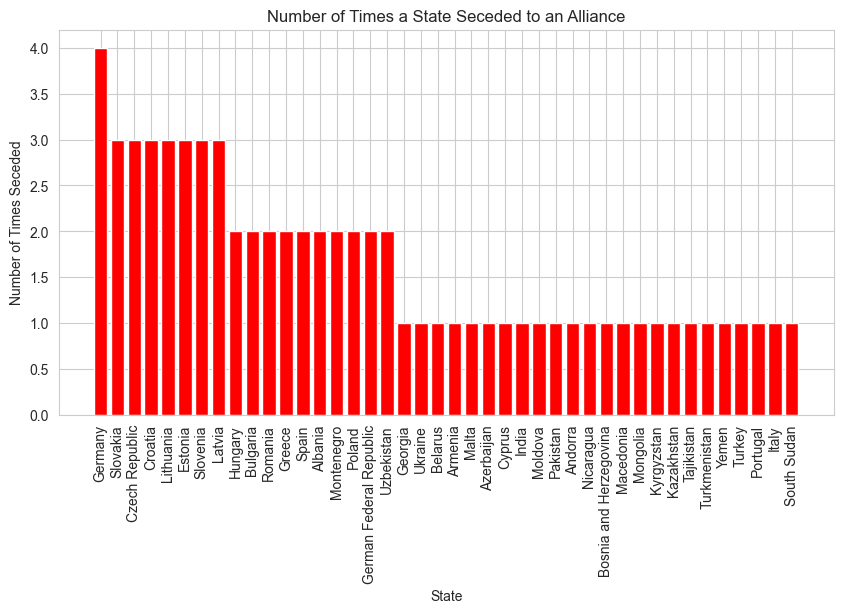

In [9]:
""" Plotting Member Secession """
plt.figure(figsize=(10, 5))
plt.bar(seceded_states.index, seceded_states, color='red')
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Number of Times Seceded")
plt.title("Number of Times a State Seceded to an Alliance")
plt.show()

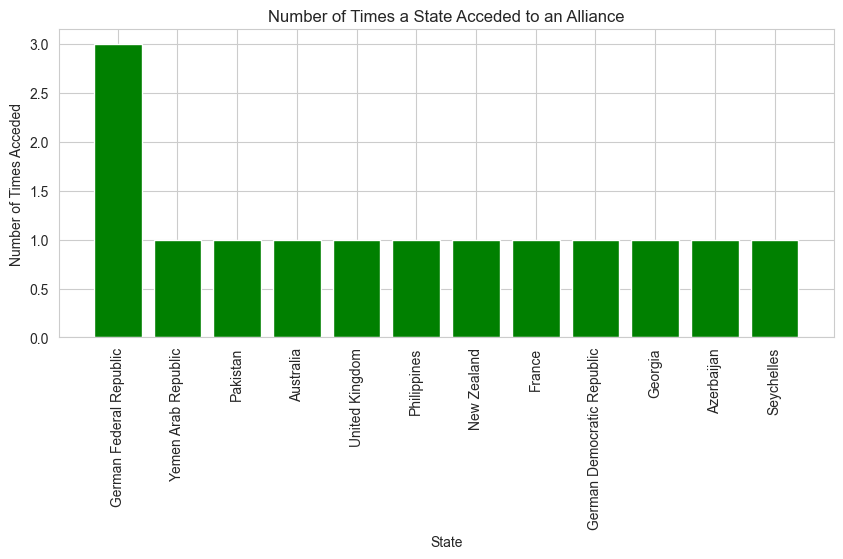

In [10]:
""" Plotting Member Secession """
plt.figure(figsize=(10, 4))
plt.bar(acceded_states.index, acceded_states, color='green')
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Number of Times Acceded")
plt.title("Number of Times a State Acceded to an Alliance")
plt.show()

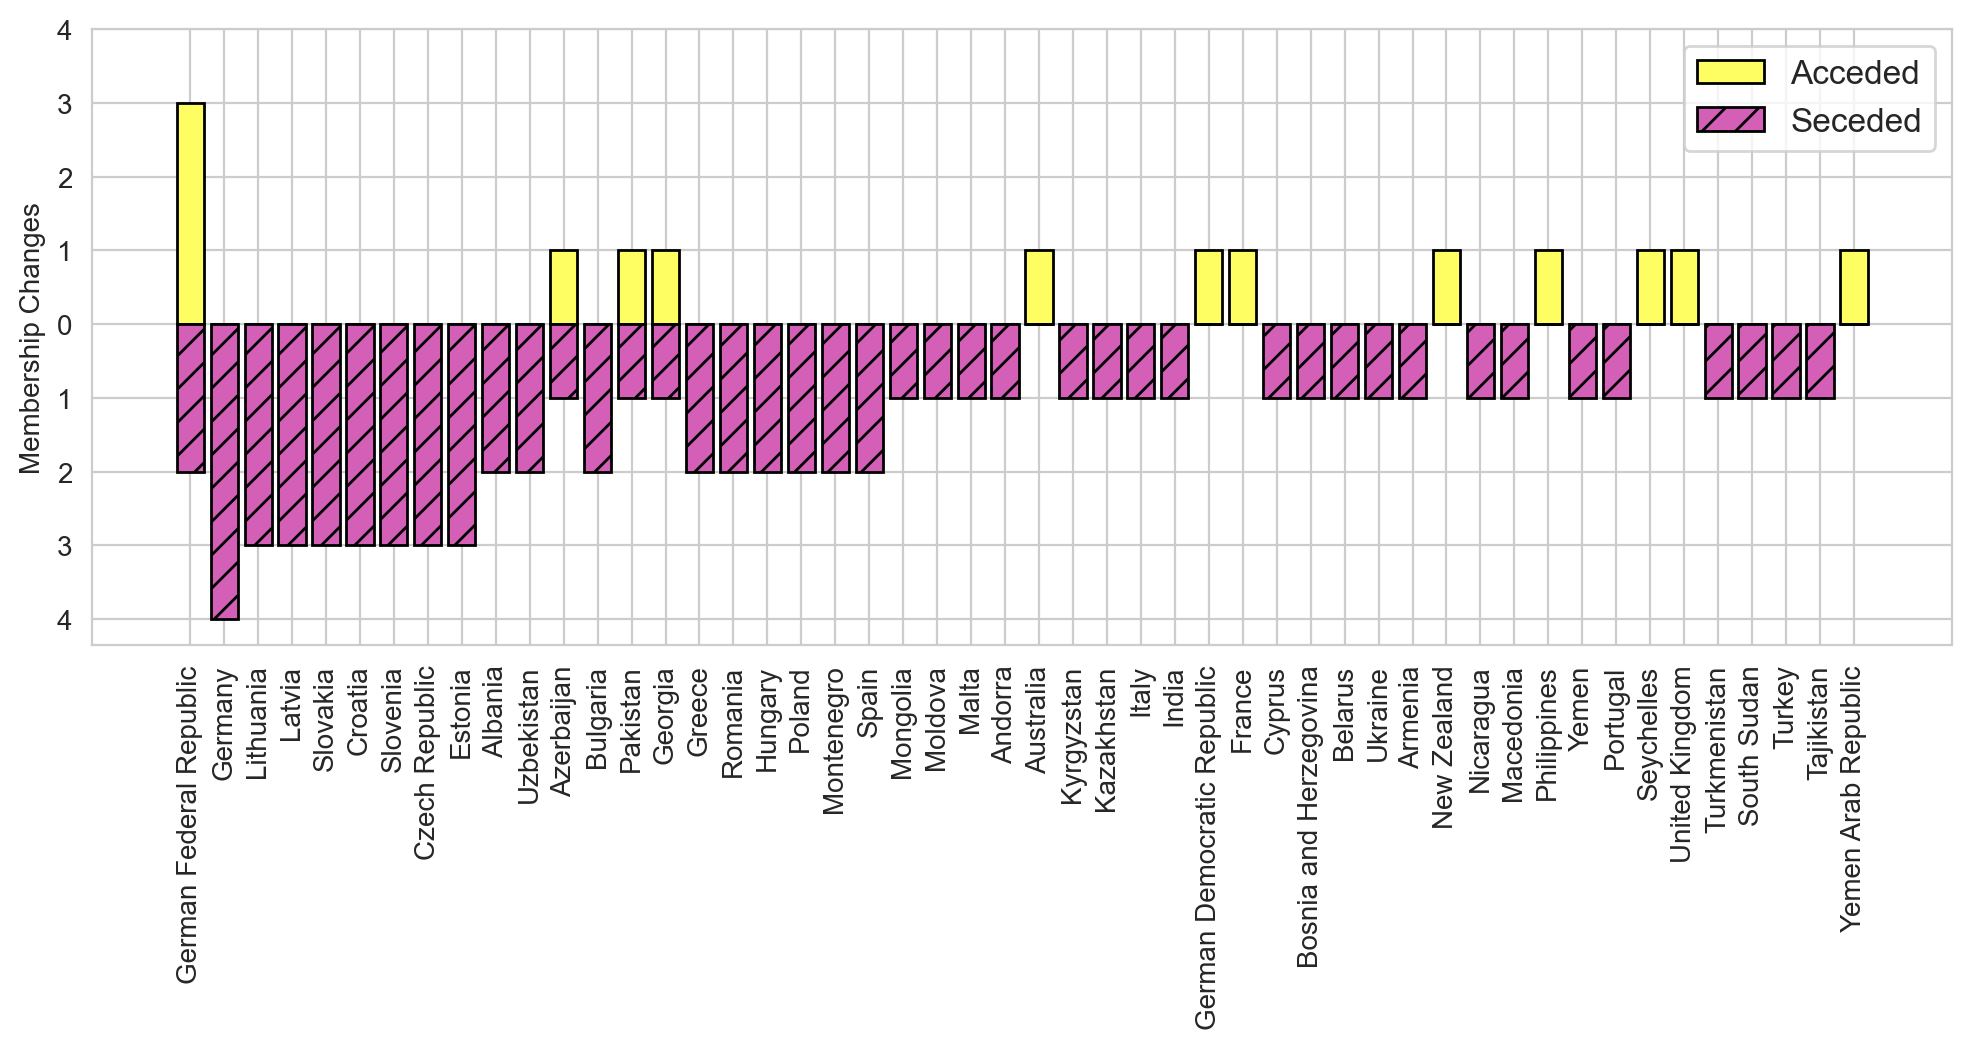

In [25]:
""" Combining Acceded and Seceded States Plots """

# Order by total accessions and secessions
combined_indices = acceded_states.index.union(seceded_states.index)
acceded_states = acceded_states.reindex(combined_indices).fillna(0)
seceded_states = seceded_states.reindex(combined_indices).fillna(0)
total_accsec = (acceded_states + seceded_states).sort_values(ascending=False)

acceded_states = acceded_states.loc[total_accsec.index]
seceded_states = seceded_states.loc[total_accsec.index]

plt.figure(figsize=(12, 4))
plt.bar(acceded_states.index, acceded_states, color=cb.quantitative['yelpnk'][0], label='Acceded', edgecolor='black')
plt.bar(seceded_states.index, -seceded_states, color=cb.quantitative['yelpnk'][1], label='Seceded', edgecolor='black', hatch='//')
plt.xticks(rotation=90)
plt.ylabel("Membership Changes")
plt.yticks(range(-4, 5, 1), [abs(i) for i in range(-4, 5, 1)])
#plt.title("Number of Times a State Acceded or Seceded an Alliance")
plt.legend(fontsize='large')
plt.show()

In [12]:
Czech_atopids = phase_alliances[phase_alliances['members'].apply(lambda x: 260 in x)]['atopid']
czech_alliances = phase_alliances[phase_alliances['atopid'].isin(Czech_atopids)]
# Notable atopids
# 3424, 3433, 3610, 3625, becomes slovakia and czech republic
#for i, j in czech_alliances.iterrows():
#    print([cow_name(x) for x in j['members']])
czech_alliances

,atopid,atopidphase,cowid,cow4id,begyr,begmo,begday,endyr,endmo,endday,...,conres,agprois,conmen,ecaid,interv,source,new5,rev5,version,members
270,3130,3130.1,3512.0,218.0,1948,3,17.0,1954,10,23.0,...,0.0,4.0,0.0,0.0,0.0,1,0,0,5.1,"{200.0, 210.0, 211.0, 212.0, 220.0}"
271,3130,3130.2,3512.0,218.0,1954,10,23.0,2011,6,30.0,...,0.0,4.0,0.0,0.0,0.0,1,0,0,5.1,"{260.0, 325.0, 230.0, 200.0, 235.0, 210.0, 211..."
281,3180,3180.1,3521.0,227.0,1949,4,4.0,1951,6,19.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,5.1,"{385.0, 2.0, 325.0, 390.0, 200.0, 235.0, 395.0..."
282,3180,3180.2,3521.0,227.0,1951,6,19.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,5.1,"{640.0, 385.0, 2.0, 260.0, 390.0, 395.0, 20.0,..."
405,3655,3655.1,NaN,NaN,1970,12,7.0,1990,10,3.0,...,1.0,0.0,0.0,0.0,0.0,1,0,0,5.1,"{290.0, 260.0}"
406,3655,3655.2,NaN,NaN,1990,10,3.0,1991,6,17.0,...,1.0,0.0,0.0,0.0,0.0,1,0,0,5.1,"{290.0, 255.0}"
423,3720,3720.1,NaN,NaN,1973,12,11.0,1990,10,3.0,...,1.0,0.0,0.0,0.0,0.0,1,0,0,5.1,"{315.0, 260.0}"
424,3720,3720.2,NaN,NaN,1990,10,3.0,1992,2,27.0,...,1.0,0.0,0.0,0.0,0.0,1,0,0,5.1,"{315.0, 255.0}"
432,3740,3740.1,3617.0,NaN,1975,8,1.0,1990,11,21.0,...,0.0,0.0,0.0,0.0,1.0,1,0,0,5.1,"{640.0, 385.0, 2.0, 260.0, 390.0, 265.0, 395.0..."
433,3740,3740.2,3617.0,NaN,1990,11,21.0,0,0,0.0,...,0.0,0.0,0.0,0.0,1.0,1,0,0,5.1,"{640.0, 385.0, 2.0, 390.0, 395.0, 20.0, 290.0,..."


In [13]:
phase_alliances

,atopid,atopidphase,cowid,cow4id,begyr,begmo,begday,endyr,endmo,endday,...,conres,agprois,conmen,ecaid,interv,source,new5,rev5,version,members
3,1020,1020.1,2005.0,3.0,1815,6,8.0,1820,5,15.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,5.1,"{267.0, 300.0, 269.0, 271.0, 240.0, 273.0, 275..."
4,1020,1020.2,2005.0,3.0,1820,5,15.0,1848,3,31.0,...,0.0,0.0,0.0,0.0,2.0,1,0,0,5.1,"{267.0, 300.0, 269.0, 271.0, 240.0, 273.0, 275..."
5,1020,1020.3,2005.0,3.0,1850,11,29.0,1866,6,15.0,...,0.0,0.0,0.0,0.0,2.0,1,0,0,5.1,"{267.0, 300.0, 269.0, 271.0, 240.0, 273.0, 275..."
22,1100,1100.1,2022.0,19.0,1834,4,22.0,1834,8,18.0,...,0.0,0.0,0.0,0.0,3.0,1,0,0,5.1,"{200.0, 235.0, 220.0, 230.0}"
23,1100,1100.2,2022.0,19.0,1834,8,18.0,1839,8,31.0,...,0.0,0.0,0.0,0.0,3.0,1,0,0,5.1,"{200.0, 235.0, 220.0, 230.0}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,6030,6030.2,NaN,NaN,2011,12,15.0,0,0,0.0,...,0.0,3.0,0.0,1.0,1.0,1,0,0,5.1,"{620.0, 325.0}"
826,6032,6032.1,NaN,NaN,2008,11,17.0,2011,12,31.0,...,1.0,0.0,0.0,0.0,1.0,1,1,0,5.1,"{2.0, 645.0}"
827,6032,6032.2,NaN,NaN,2012,1,1.0,0,0,0.0,...,0.0,0.0,0.0,0.0,1.0,1,1,0,5.1,"{2.0, 645.0}"
830,6045,6045.1,NaN,412.0,2012,2,10.0,2012,3,27.0,...,0.0,0.0,0.0,0.0,1.0,1,0,0,5.1,"{625.0, 626.0}"


In [14]:
phase_alliances[phase_alliances['atopid'] == 3740]
for i, j in phase_alliances[phase_alliances['atopid'] == 3740].iterrows():
    print(len([cow_name(x) for x in j['members']]))
    print()

35

57

